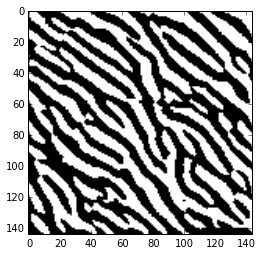

In [3]:
import scipy.io as sio
import scipy
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

gray = scipy.io.loadmat('WB_different_ratio.mat')
gray = gray['result']
gray=np.reshape(gray[:,0],(144,144)).T
plt.imshow(gray,'gray')

In [5]:
import cv2
#(thresh, im_bw) = cv2.threshold(gray1, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
#im_wb=abs(im_bw-1)
#im_wb=abs(im_bw)

import numpy as np
from scipy import ndimage as ndi
import scipy.io as sio
from skimage.morphology import medial_axis
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm

gray_tot = scipy.io.loadmat('WB_different_ratio.mat')
gray_tot = gray_tot['result']

image=np.zeros((10,144*144))
for i in tqdm(range(0,10)):
    gray = np.reshape(gray_tot[:,i],(144,144)).T

    (thresh, im_bw) = cv2.threshold(gray, 0, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    im_wb=abs(im_bw-1)
    #im_wb=abs(im_bw)
    data=im_wb;


    # Compute the medial axis (skeleton) and the distance transform
    skel, distance = medial_axis(data, return_distance=True)

    # Distance to the background for pixels of the skeleton
    dist_on_skel = distance * skel

#fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True,
#                               subplot_kw={'adjustable': 'box-forced'})
#ax1.imshow(data, cmap=plt.cm.gray, interpolation='nearest')
#ax1.axis('off')
#ax2.imshow(dist_on_skel, cmap=plt.cm.spectral, interpolation='nearest')
#ax2.contour(data, [0.5], colors='w')
#ax2.axis('off')

#fig.tight_layout()
#plt.show()


#import scipy.io as sio
#sio.savemat('test_cv.mat',{'dist_on_skel':dist_on_skel})

    dist_on_skel[dist_on_skel>1]=1
    dist_on_skel[dist_on_skel!=1]=0
    #plt.imshow(dist_on_skel,'gray')
    kernel = np.ones((2,2),np.uint8)
    sure_bg = cv2.dilate(dist_on_skel,kernel,iterations=1)
    #fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(16, 8), sharex=True, sharey=True,
    #                           subplot_kw={'adjustable': 'box-forced'})
    
    sure_bg=np.reshape(sure_bg,(1,144*144))
    image[i,:]=sure_bg


100%|██████████████████████████████████████████| 10/10 [00:01<00:00,  6.11it/s]


In [23]:
i

0

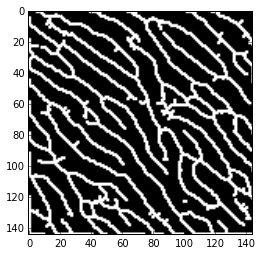

In [7]:
plt.imshow(np.reshape(image[0,:],(144,144)),'gray')

In [8]:
sio.savemat('WB_different_ratio_skeleton.mat', {'image':image})